# Import necessary libraries

In [ ]:
import wave
import matplotlib.pyplot as plt
import numpy as np
import pyaudio
from pydub import AudioSegment
import speech_recognition as sr

# Define audio parameters

In [ ]:
CHUNK = 1024  # Number of frames per buffer
FORMAT = pyaudio.paInt16  # Audio format
CHANNELS = 1  # Number of channels (mono)
RATE = 44100  # Sampling rate
RECORD_SECONDS = 5  # Duration of recording

# **Define filter parameters**

In [ ]:
CUTOFF_FREQ = 3000  # Cutoff frequency for low-pass filter

# Record audio

In [ ]:
# Initialize PyAudio
p = pyaudio.PyAudio()

# Create a stream for recording
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Recording audio...")

# Record audio data in chunks
frames = []
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Finished recording.")

# Stop the stream and close PyAudio
stream.stop_stream()
stream.close()
p.terminate()

# Save the recorded audio to a temporary WAV file

In [ ]:
wf = wave.open("recorded_audio.wav", 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

# Apply low-pass filter using PyDub

In [ ]:
audio_segment = AudioSegment.from_wav("recorded_audio.wav")
filtered_audio = audio_segment.low_pass_filter(CUTOFF_FREQ)

# Save the filtered audio to a new WAV file

In [ ]:
filtered_audio.export("filtered_audio.wav", format="wav")

<_io.BufferedRandom name='filtered_audio.wav'>

# Plot the sound before and after filtering

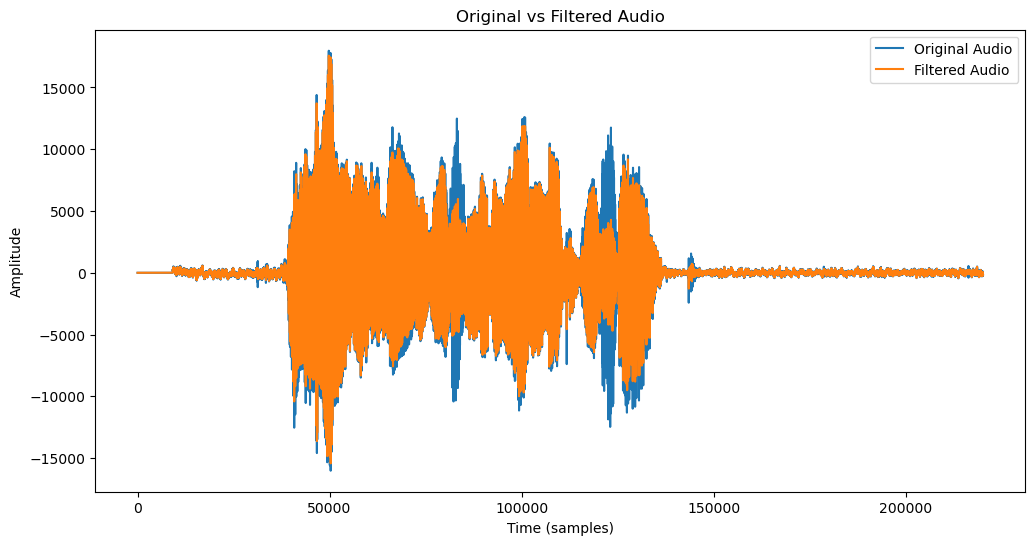

In [ ]:
# Load audio data as NumPy arrays
original_audio_data = np.frombuffer(audio_segment.raw_data, dtype=np.int16)
filtered_audio_data = np.frombuffer(filtered_audio.raw_data, dtype=np.int16)

# Plot the original and filtered audio waveforms
plt.figure(figsize=(12, 6))
plt.plot(original_audio_data, label="Original Audio")
plt.plot(filtered_audio_data, label="Filtered Audio")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Original vs Filtered Audio")
plt.legend()
plt.show()

# Load the filtered audio for speech recognition

In [ ]:
r = sr.Recognizer()
with sr.AudioFile("filtered_audio.wav") as source:
    audio = r.record(source)  # read the entire audio file

# Perform speech recognition

In [ ]:
try:
    text = r.recognize_google(audio)
    print("Transcribed text:", text)
except sr.UnknownValueError:
    print("Could not understand audio")
except sr.RequestError as e:
    print("Could not request results from speech recognition service; {0}".format(e))


Transcribed text: hello my name is marijuana magnesite
